# Wikipedia Metrics Plots
# 4b_Wikipedia_Metrics_Plots.ipynb
1) Visualize relationships between Wikipedia activity metrics using scatterplots
* (A) No. of edits vs. No. of users
* (B) Size of edits vs. No. of users

2) Model these relationships using:

* mean ratio
* linear regression

## Import libraries
1. pandas - Python Data Analysis Library _(http://pandas.pydata.org)_
2. numpy - Numerical Python _(http://numpy.org)_
3. matplotlib - Python Plotting Library _(http://matplotlib.org)_
4. scipy - Python Library for Scientific Computing _(http://scipy.org)_

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

## Read CSV file with Wikipedia activity metrics

In [2]:
fn = "/root/Downloads/DIY_Data_Analytics-20200116T140155Z-001/DIY_Data_Analytics/output/wikipedia_metrics.csv"
df = pd.read_csv(fn)

In [3]:
df.head()

,index,title,edits,size,users
0,0,50_Cent,13066,518204129,4557
1,1,Adele,6725,456912673,2672
2,2,Angelina_Jolie,7336,531496219,2902
3,3,Backstreet_Boys,10270,412497115,4050
4,4,Ben_Affleck,9263,906521569,3655


## A) Make scatterplot showing relationship between:
* No. of edits vs. No. of users

Define x and y variables

In [4]:
x = df["users"]
y = df["edits"]

Plot x vs. y

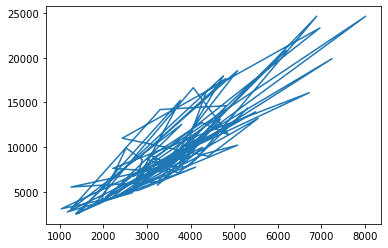

In [5]:
plt.plot(x, y)

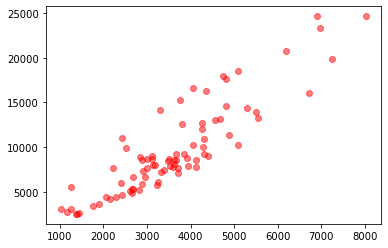

In [6]:
plt.plot(x, y, color='red', marker='o', alpha=0.5, linestyle='') 

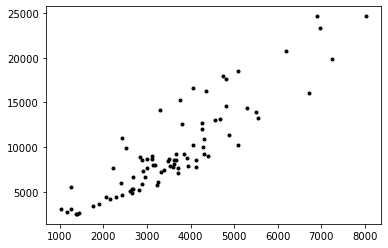

In [7]:
plt.plot(x, y, c='k', marker='.', ls='') # using keyword shortcuts

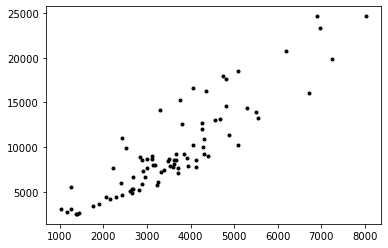

In [8]:
plt.plot(x, y, 'k.') # using special shortcut: 'k' here means color black

Add axis labels, minor ticks in axes, and plot title

Text(0.5, 1.0, "Forbes 100 Celebrities' Wikipedia Pages")

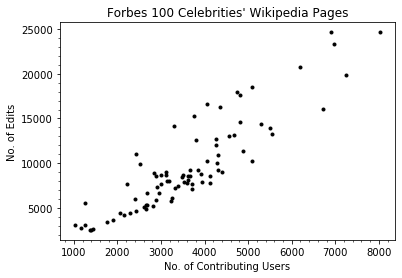

In [9]:
plt.plot(x, y, 'k.')

# add axis labels
plt.xlabel("No. of Contributing Users")
plt.ylabel("No. of Edits")
plt.minorticks_on()
plt.title("Forbes 100 Celebrities' Wikipedia Pages")

## Quantify the relationship using:
1. Mean Ratio

In [10]:
mean_ratio = np.mean(y/x)
mean_ratio

2.609397656944558

## Overlay in plot the line: y = mean_ratio * x

In [11]:
xx = np.linspace(800, 8400, 1000)
yy = mean_ratio * xx

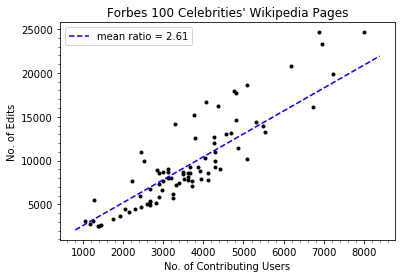

In [12]:
plt.plot(x, y, 'k.')
plt.plot(xx, yy, 'b--', label = "mean ratio = %.2f" % mean_ratio)

# add axis labels
plt.xlabel("No. of Contributing Users")
plt.ylabel("No. of Edits")
plt.minorticks_on()
plt.title("Forbes 100 Celebrities' Wikipedia Pages")
plt.legend(loc="upper left", numpoints=1)

## Quantify the relationship using:
2. Linear Regression Fit: y vs. (x-mean(x))

In [13]:
x_mean = np.mean(x)
x_mean

3604.2073170731705

In [14]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x-x_mean, y)

In [15]:
slope, intercept

(3.17979447002623, 9626.134146341463)

In [16]:
r_value, p_value, std_err

(0.8905379922596315, 4.2851570848777807e-29, 0.1816042523931428)

## Overlay in plot the linear regression fit: 
* y = slope * (x - x_mean) + intercept

In [17]:
xx = np.linspace(800, 8400, 1000)
xx

array([ 800.        ,  807.60760761,  815.21521522,  822.82282282,
        830.43043043,  838.03803804,  845.64564565,  853.25325325,
        860.86086086,  868.46846847,  876.07607608,  883.68368368,
        891.29129129,  898.8988989 ,  906.50650651,  914.11411411,
        921.72172172,  929.32932933,  936.93693694,  944.54454454,
        952.15215215,  959.75975976,  967.36736737,  974.97497497,
        982.58258258,  990.19019019,  997.7977978 , 1005.40540541,
       1013.01301301, 1020.62062062, 1028.22822823, 1035.83583584,
       1043.44344344, 1051.05105105, 1058.65865866, 1066.26626627,
       1073.87387387, 1081.48148148, 1089.08908909, 1096.6966967 ,
       1104.3043043 , 1111.91191191, 1119.51951952, 1127.12712713,
       1134.73473473, 1142.34234234, 1149.94994995, 1157.55755756,
       1165.16516517, 1172.77277277, 1180.38038038, 1187.98798799,
       1195.5955956 , 1203.2032032 , 1210.81081081, 1218.41841842,
       1226.02602603, 1233.63363363, 1241.24124124, 1248.84884

In [18]:
xx_fit = xx - x_mean
yy_fit = slope*xx_fit + intercept 
yy_fit

array([  709.33122671,   733.52185531,   757.71248391,   781.90311251,
         806.09374111,   830.28436971,   854.47499831,   878.66562691,
         902.85625551,   927.04688411,   951.23751271,   975.42814131,
         999.61876991,  1023.80939852,  1048.00002712,  1072.19065572,
        1096.38128432,  1120.57191292,  1144.76254152,  1168.95317012,
        1193.14379872,  1217.33442732,  1241.52505592,  1265.71568452,
        1289.90631312,  1314.09694173,  1338.28757033,  1362.47819893,
        1386.66882753,  1410.85945613,  1435.05008473,  1459.24071333,
        1483.43134193,  1507.62197053,  1531.81259913,  1556.00322773,
        1580.19385633,  1604.38448493,  1628.57511354,  1652.76574214,
        1676.95637074,  1701.14699934,  1725.33762794,  1749.52825654,
        1773.71888514,  1797.90951374,  1822.10014234,  1846.29077094,
        1870.48139954,  1894.67202814,  1918.86265675,  1943.05328535,
        1967.24391395,  1991.43454255,  2015.62517115,  2039.81579975,
      

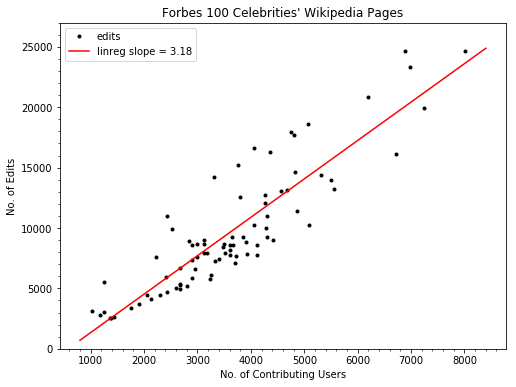

In [34]:
plt.figure(figsize=(8,6))
plt.plot(x, y, 'k.')
#plt.plot(xx, yy, 'b--', label = "mean ratio = %.2f" % mean_ratio)
plt.plot(xx, yy_fit, 'r-', label = "linreg slope = %.2f" % slope)

# add axis labels
plt.xlabel("No. of Contributing Users")
plt.ylabel("No. of Edits")
plt.minorticks_on()
plt.title("Forbes 100 Celebrities' Wikipedia Pages")
plt.legend(loc="upper left", numpoints=1)
plt.ylim((0, 27000))

# save to PNG file
plt.savefig("../fig/fig_wikipedia_users_vs_no_of_edits.png")